# DNN Model

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [76]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [77]:
# NN model prep
input_size = 3
output_size = 2
hidden_layer_1_size = 10
hidden_layer_2_size = 10
hidden_layer_3_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_2_size, activation='softmax'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


In [78]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [79]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [80]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/1000
102/102 - 5s - loss: 0.7801 - root_mean_squared_error: 0.8832 - val_loss: 0.7270 - val_root_mean_squared_error: 0.8526 - 5s/epoch - 50ms/step
Epoch 2/1000
102/102 - 0s - loss: 0.7098 - root_mean_squared_error: 0.8425 - val_loss: 0.6554 - val_root_mean_squared_error: 0.8096 - 254ms/epoch - 2ms/step
Epoch 3/1000
102/102 - 0s - loss: 0.6373 - root_mean_squared_error: 0.7983 - val_loss: 0.5815 - val_root_mean_squared_error: 0.7626 - 256ms/epoch - 3ms/step
Epoch 4/1000
102/102 - 0s - loss: 0.5626 - root_mean_squared_error: 0.7501 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111 - 242ms/epoch - 2ms/step
Epoch 5/1000
102/102 - 0s - loss: 0.4877 - root_mean_squared_error: 0.6984 - val_loss: 0.4327 - val_root_mean_squared_error: 0.6578 - 256ms/epoch - 3ms/step
Epoch 6/1000
102/102 - 1s - loss: 0.4137 - root_mean_squared_error: 0.6432 - val_loss: 0.3612 - val_root_mean_squared_error: 0.6010 - 538ms/epoch - 5ms/step
Epoch 7/1000
102/102 - 0s - loss: 0.3424 - root_mean_squared

In [81]:
# ANN model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (1, 3)                    12        
                                                                 
 dense_21 (Dense)            (1, 10)                   40        
                                                                 
 dense_22 (Dense)            (1, 10)                   110       
                                                                 
 dense_23 (Dense)            (1, 10)                   110       
                                                                 
 dense_24 (Dense)            (1, 2)                    22        
                                                                 
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


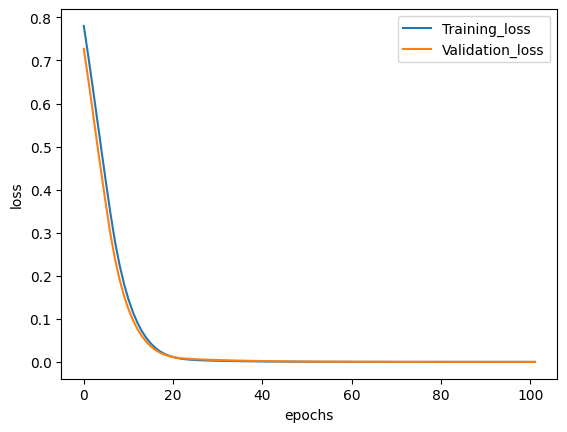

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model check on Test data

In [83]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1/1 [==============================] - 0s 223ms/step - loss: 2.9518e-05 - root_mean_squared_error: 0.0054


In [84]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 0.0000. Test accuracy: 0.0054 rmse


In [85]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(prediction)
test_targets = pd.DataFrame(test_targets)
pred_accu = (prediction/test_targets)*100

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Target-R(%)', 'Prediction-St(%)','Prediction-R(%)','Pred-Accu-St(%)','Pred-Accu-R(%)']
result

1/1 [==============================] - 0s 147ms/step


,Target-St(%),Target-R(%),Prediction-St(%),Prediction-R(%),Pred-Accu-St(%),Pred-Accu-R(%)
0,0.938767,0.947619,0.944971,0.955338,100.660845,100.814555
1,0.979012,0.987826,0.976985,0.991221,99.792936,100.343675
2,0.966854,0.975332,0.969434,0.983572,100.266839,100.844865
3,0.983239,0.979754,0.980339,0.976615,99.705032,99.679631
4,0.999646,1.000000,1.006230,1.006295,100.658618,100.629508
5,0.990412,1.000000,0.987198,0.998730,99.675549,99.873048
6,0.991350,0.987596,0.984267,0.981966,99.285484,99.429900
7,0.976922,0.980144,0.980339,0.976615,100.349793,99.639942
8,0.977105,0.979754,0.973831,0.966876,99.664900,98.685541
9,0.939463,0.947287,0.934684,0.948210,99.491256,100.097457


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

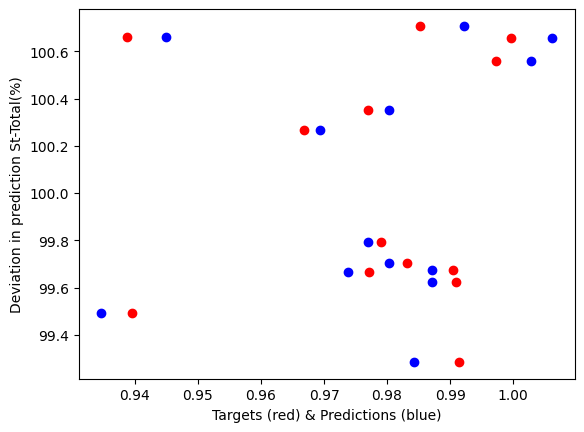

In [86]:
plt.scatter(result['Target-St(%)'], result['Pred-Accu-St(%)'], color='r')
plt.scatter(result['Prediction-St(%)'], result['Pred-Accu-St(%)'], color='b')
plt.ylabel('Deviation in prediction St-Total(%)')
plt.xlabel('Targets (red) & Predictions (blue)')


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

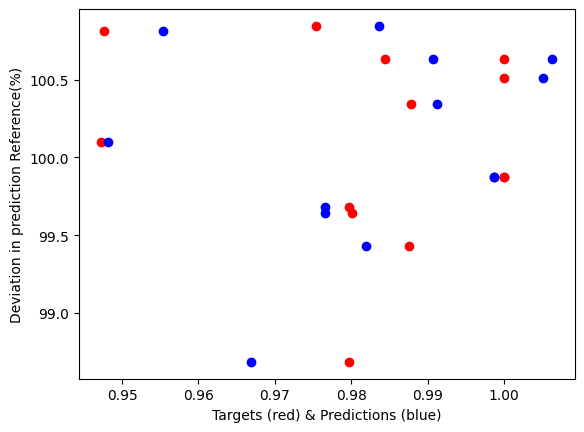

In [87]:
plt.scatter(result['Target-R(%)'], result['Pred-Accu-R(%)'], color='r')
plt.scatter(result['Prediction-R(%)'], result['Pred-Accu-R(%)'], color='b')
plt.ylabel('Deviation in prediction Reference(%)')
plt.xlabel('Targets (red) & Predictions (blue)')


In [88]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
r2_score_test

0.9058545170731729

In [89]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
adj_r2_score

0.8930164966740601

In [90]:
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 0.51 [%]
Average test prediction precision 99.49 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [91]:
import keras
model.save('micro_dsc_dl.h5')